## Berrima/CPOL data viewing

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

dict_keys(['HomeyerRainbow_r', 'HomeyerRainbow'])


In [2]:
berr_data_file_path = '/home/rjackson/data/radar/cfrad.20051224_123004.000_to_20051224_123751.000_Berrima_v6136_UNKNOWN_SUR.nc'

In [3]:
berr = pyart.io.read(berr_data_file_path)
berr.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	positive: up
	units: meters
	_FillValue: -9999.0
	long_name: altitude
altitude_agl:
	data: <ndarray of type: float64 and shape: (1,)>
	positive: up
	units: meters
	_FillValue: -9999.0
	long_name: altitude_above_ground_level
antenna_transition:
	data: <ndarray of type: int8 and shape: (6480,)>
	units: 
	comment: 1 if antenna is in transition, 0 otherwise
	_FillValue: -128
	long_name: antenna_is_in_transition_between_sweeps
azimuth:
	data: <ndarray of type: float32 and shape: (6480,)>
	units: degrees
	_FillValue: -9999.0
	long_name: ray_azimuth_angle
elevation:
	data: <ndarray of type: float32 and shape: (6480,)>
	positive: up
	units: degrees
	_FillValue: -9999.0
	long_name: ray_elevation_angle
fields:
	sim_velocity:
		data: <ndarray of type: float64 and shape: (6480, 401)>
		units: meters_per_second
		standard_name: radial_velocity_of_scatterers_away_from_instrument
		coordinates: elevation azimuth range
		long_name: Simulated

(-100, 100)

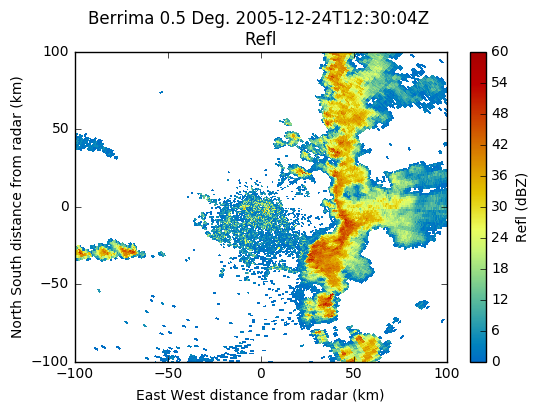

In [14]:
display = pyart.graph.RadarMapDisplay(berr)
gatefilter = pyart.correct.GateFilter(berr)
gatefilter.exclude_below('Refl', 0)
display.plot_ppi('Refl', sweep=0, vmin=0, vmax=60, cmap='pyart_HomeyerRainbow',
                 gatefilter=gatefilter)
plt.xlim([-100,100])
plt.ylim([-100,100])

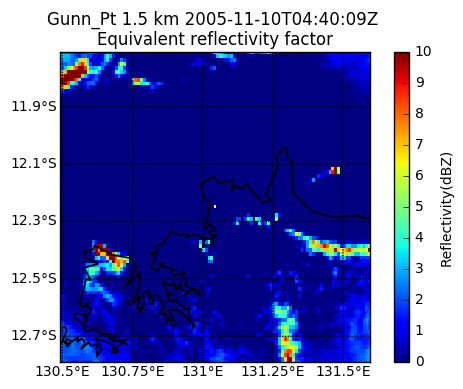

In [30]:
display = pyart.graph.GridMapDisplay(berr)
display.plot_basemap(min_lat=-12.75, max_lat=-12,
                     min_lon=130.5, max_lon=131.5,
                     lat_lines=[-12.7, -12.5, -12.3, -12.1, -11.9],
                     lon_lines=[130.5, 130.75, 131.0, 131.25, 131.5],
                     resolution='i')
display.plot_grid('DT', level=2, vmin=0, vmax=10)
